In [1]:
!pip install surprise

    100% |████████████████████████████████| 3.3MB 11.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/ec/c0/55/3a28eab06b53c220015063ebbdb81213cd3dcbb72c088251ec
Successfully built scikit-surprise


In [0]:
#Import the required classes and methods from the surprise library
from surprise import Reader, Dataset
import pandas as pd #For dataframe manipulation
import surprise
import seaborn as sns #For visualization
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import cross_validate

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Define a Reader object
#The Reader object helps in parsing the file or dataframe containing ratings
reader = Reader(rating_scale=(0, 5)) #Our rating values lie in the range (0,5)
df = pd.read_csv('/content/drive/Team Drives/256 - Erinaki/ratings_Books.csv')

In [5]:
df.head()

,AH2L9G3DQHHAJ,0000000116,4.0,1019865600
0,A2IIIDRK3PRRZY,0000000116,1.0,1395619200
1,A1TADCM7YWPQ8M,0000000868,4.0,1031702400
2,AWGH7V0BDOJKB,0000013714,4.0,1383177600
3,A3UTQPQPM4TQO0,0000013714,5.0,1374883200
4,A8ZS0I5L5V31B,0000013714,5.0,1393632000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22507154 entries, 0 to 22507153
Data columns (total 4 columns):
AH2L9G3DQHHAJ    object
0000000116       object
4.0              float64
1019865600       int64
dtypes: float64(1), int64(1), object(2)
memory usage: 686.9+ MB


In [7]:
df.shape

(22507154, 4)

In [0]:
df = df.rename(columns={"AH2L9G3DQHHAJ": "userId", "0000000116": "itemId","4.0": "rating","1019865600": "timestamp"}) #rename columns as userId,itemId and rating

In [9]:
df.head()

,userId,itemId,rating,timestamp
0,A2IIIDRK3PRRZY,0000000116,1.0,1395619200
1,A1TADCM7YWPQ8M,0000000868,4.0,1031702400
2,AWGH7V0BDOJKB,0000013714,4.0,1383177600
3,A3UTQPQPM4TQO0,0000013714,5.0,1374883200
4,A8ZS0I5L5V31B,0000013714,5.0,1393632000


In [0]:
df = df.drop(columns='timestamp') #Drop column timestamp

In [11]:
df.head()

,userId,itemId,rating
0,A2IIIDRK3PRRZY,0000000116,1.0
1,A1TADCM7YWPQ8M,0000000868,4.0
2,AWGH7V0BDOJKB,0000013714,4.0
3,A3UTQPQPM4TQO0,0000013714,5.0
4,A8ZS0I5L5V31B,0000013714,5.0


In [21]:
df.nunique() #number of unique values for each feature

userId    8026324
itemId    2330066
rating          5
dtype: int64

In [12]:
df.rating.value_counts()

5.0    13886788
4.0     4602554
3.0     1922390
1.0     1116862
2.0      978560
Name: rating, dtype: int64

In [0]:
#Drop duplicate rows in place
df.drop_duplicates(subset=['userId', 'itemId', 'rating'], keep=False, inplace=True)

In [14]:
df.head()

,userId,itemId,rating
0,A2IIIDRK3PRRZY,0000000116,1.0
1,A1TADCM7YWPQ8M,0000000868,4.0
2,AWGH7V0BDOJKB,0000013714,4.0
3,A3UTQPQPM4TQO0,0000013714,5.0
4,A8ZS0I5L5V31B,0000013714,5.0


In [15]:
df.shape #no duplicate rows

(22507154, 3)

In [16]:
df=df.dropna() #no missing values
df.shape

(22507154, 3)

In [22]:
df.describe()

,rating
count,2.250715e+07
mean,4.295759e+00
std,1.111507e+00
min,1.000000e+00
25%,4.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


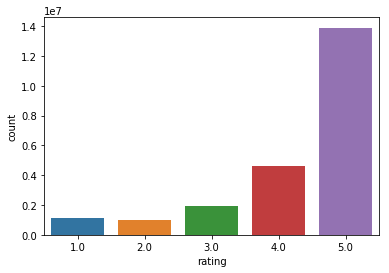

In [17]:
#View a plot of the rating counts
sns.countplot(x="rating", data=df)

In [0]:
sampleData= df.sample(n=1000000)

In [19]:
sampleData.shape

(1000000, 3)

In [20]:
sampleData.head()

,userId,itemId,rating
9262940,A3LCNWHAL23586,0787958476,4.0
20532603,A2R6DRPBXQ4B09,B008TAW6KA,5.0
12562557,A3927RPXAASUTR,1401324924,5.0
7387049,A1NOIU1WMYQPYL,0671014218,5.0
3459152,AYNOSV6UEFONB,0316910333,5.0


In [0]:
#Create the surprise dataset
data = Dataset.load_from_df(sampleData[['userId', 'itemId', 'rating']], reader)

In [0]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.30)

In [0]:
#Define the algorithm with final tuned parameters
algo=SVD(n_factors=132, n_epochs=50, lr_all=0.01, reg_all=0.2, random_state=42, verbose=True)
#algo=SVD(n_factors=152, n_epochs=50, lr_all=0.01, reg_all=0.2, random_state=42, verbose=True)

In [27]:
#Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing

{'fit_time': (185.1348786354065,
  193.71224999427795,
  186.02666997909546,
  191.12446117401123,
  189.52958154678345),
 'test_mae': array([0.82237964, 0.82330737, 0.82104216, 0.82284916, 0.82208072]),
 'test_rmse': array([1.07588823, 1.07732272, 1.07450703, 1.07793372, 1.0756281 ]),
 'test_time': (1.6203558444976807,
  1.6499640941619873,
  1.740128755569458,
  1.8896639347076416,
  1.6802783012390137)}

In [28]:
algo.fit(trainset)
predictions_svd = algo.test(testset)#Build the model using entire training dataset after selecting parameters

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49


In [29]:
#validating rating predictions using RMSE
accuracy.rmse(predictions_svd, verbose=True) 

RMSE: 1.0758


1.0757694030602427


RMSE: 1.0766
1.076637100362752 @ algo=SVD(n_factors=152, n_epochs=50, lr_all=0.01, reg_all=0.2, random_state=42, verbose=True)

RMSE: 1.0758 @ svd(n factors = 132, n_epochs=50, lr_all=0.01, reg_all=0.2, random_state=42, verbose=True)


In [0]:
#this is baseline configuration for optimizing the error
bsl_options = {'method': 'als',#another option is sgd
              'n_epochs': 5, # number of iterations
              'reg_u': 12, # user-regularisation parameter
              'reg_i': 5   # item-regularisation parameter
              }

In [31]:
from surprise import BaselineOnly

bl = BaselineOnly(bsl_options=bsl_options) #neighbours=3
bl.fit(trainset)
predictions_bl = bl.test(testset)

Estimating biases using als...


In [32]:
accuracy.rmse(predictions_bl)

RMSE: 1.0775


1.0774604781134478

RMSE: 1.0785 for sample size=1000000
1.0785183442511395 @ {'method': 'als',#another option is sgd
              'n_epochs': 5, # number of iterations
              'reg_u': 12, # user-regularisation parameter
              'reg_i': 5   # item-regularisation parameter
              }
RMSE: 1.0269
1.0269053467351497 for sample size=10000000
RMSE: 1.0467
1.0467486515926006 for sample size=5000000

In [0]:
from collections import defaultdict
def get_top10_recommendations(predictions, topN = 10):
    
   top_recs = defaultdict(list)
   for uid, iid, true_r, est, _ in predictions:
       top_recs[uid].append((iid, est))
    
   for uid, user_ratings in top_recs.items():
       user_ratings.sort(key = lambda x: x[1], reverse = True)
       top_recs[uid] = user_ratings[:topN]
    
   return top_recs

In [0]:
top10_recommendation_svd = get_top10_recommendations(predictions_svd)

In [35]:
# For each user we print 10 recommendation
i=0;
for uid, user_ratings in top10_recommendation_svd.items():
   print(uid, [iid for (iid, _) in user_ratings])
   i=i+1;
   if(i==10):
       break;

A222084C717YKI ['0307407950']
A1N5XQPEENK5ZM ['1592400701']
A6ZT17GQD7KC6 ['1591394376']
ASK0DBWFM6BSC ['B005JFBRCQ']
A1CEHH55E7UEQ ['1439123144']
A1S0KQTJNMW7FC ['1612383793']
A7N0HL8RVQWWU ['B008X6TCNE']
A25UC8O8JR259S ['0062278789']
A2JE8BBM25ZFXB ['0761556230']
AMQFQOPBNROP9 ['1602601577', '1602600120']


In [0]:
top10_recommendations_als = get_top10_recommendations(predictions_bl)

In [37]:
# For each user we print 10 recommendation
i=0;
for uid, user_ratings in top10_recommendations_als.items():
   print(uid, [iid for (iid, _) in user_ratings])
   i=i+1;
   if(i==10):
       break;

A222084C717YKI ['0307407950']
A1N5XQPEENK5ZM ['1592400701']
A6ZT17GQD7KC6 ['1591394376']
ASK0DBWFM6BSC ['B005JFBRCQ']
A1CEHH55E7UEQ ['1439123144']
A1S0KQTJNMW7FC ['1612383793']
A7N0HL8RVQWWU ['B008X6TCNE']
A25UC8O8JR259S ['0062278789']
A2JE8BBM25ZFXB ['0761556230']
AMQFQOPBNROP9 ['1602601577', '1602600120']
